# EM (Expectation Maximum) 算法

最大期望算法，他是用于估计参数的迭代思想。

EM算法是一种迭代算法，是一种包含隐变量的极大似然估计算法

**包含两个步骤：**
1) “E步” 计算期望
2) “M步” 最大化



## EM算法和GMM模型

### 对于单高斯任务
如果我们有一批数据 $x_1, x_2, \dots, x_n $, 采样来自于正态分布采样。

那么我们可以使用极大似然估计的方法来计算正态分布的参数  $ \theta = \{ \mu, \Sigma\}$

那么就有：

$\mathcal{L}(\theta | \bar{x}) = \sum_{i=1}^n logP(x_i | \theta)$

其中 $\mathcal{L}(\theta | \bar{x})$ 表示log-likelihood, 求这个式子的最大值，那么就对 $\theta$求导：

正态分布公式：

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x- \mu )^2}{2\sigma^2}}
$$

---

$
\begin{aligned}
& \mu_{MLE} \,:\, \frac{\partial \mathcal{L}(\mu, \Sigma | \bar{x})}{\partial \mu} = 0 \\[4mm]
& \frac{\partial (\sum_{i=1}^n -\frac{(x_i- \mu )^2}{2\sigma^2})}{\partial \mu} \\[4mm]
& = -\sum_{i=1}^n \frac{(x_i - \mu )}{\sigma^2} = 0 \\[4mm]
& \Rightarrow \sum_{i=1}^n x_i = \sum_{i=1}^n \mu \\[4mm]
& \Rightarrow \mu_{MLE} = \frac{1}{n} \sum_{i=1}^n x_i
\end{aligned}
$

---

$
\begin{aligned}
& \Sigma_{MLE} \,:\, \frac{\partial \mathcal{L}(\mu, \Sigma | \bar{x})}{\partial \Sigma} = 0 \\[4mm]
& \frac{\partial (\sum_{i=1}^n log[\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x- \mu_{MLE} )^2}{2\sigma^2}}])}{\partial \sigma} \\[4mm]
& = \frac{\partial \sum_{i=1}^n log\frac{1}{\sigma \sqrt{2\pi}}}{\partial \sigma} + \frac{\partial (\sum_{i=1}^n -\frac{(x - \mu_{MLE})^2}{2\sigma^2})}{\partial \sigma} \\[4mm]
& = -\frac{n}{\sigma} + \sum_{i=1}^n (\frac{(x_i - \mu_{MLE})^2}{\sigma^3}) = 0 \\[4mm]
& \Rightarrow \sigma^2_{MLE} = \frac{(x_i - \mu_{MLE})^2}{n}
\end{aligned}
$

---


## 对于多高斯任务

高斯混合模型（GMM）

模型参数 $let \Theta = \{ \alpha_1, \dots, \alpha_k, \mu_1, \dots, \mu_k, \Sigma_1, \dots, \Sigma_k \}$

高斯混合模型的极大似然估计：

$\Theta_{MLE} = \arg\max\limits_{\theta} \mathcal{L}(\Theta, X) 
= \arg\max\limits_{\theta} (\sum_{i=1}^n log \sum_{l=1}^k \alpha_l \mathcal{N}(X | \mu_l, \Sigma_l)) $

其中：

$\sum_{l=1}^k \alpha_l = 1$

此时，如果我们想要通过和单高斯一样，通过求偏导，然后让偏导等于0求解参数，就会很难计算。

我们可以使用迭代的方法来计算，这个迭代的方法就是`EM算法`。

## EM算法

通过引入隐变量Z来简化计算，并且让计算过程变成了一个迭代的过程。

即 $\Theta = \{ \theta^{(1)}, \theta^{(2)}, \dots, \theta^{(t)} \}$

EM算法的公式：

$ \Theta^{(g+1)} = \arg\max\limits_{\theta}(\int_z log(P(x, z|\theta))P(z|x, \Theta^{(g)})dz )$

其中z是一个隐变量(latent variable)， x 是观测数据， $\theta$是参数

### 证明EM算法能够收敛

EM算法的最终目的是为了求解 $\arg\max\limits_{\theta} \mathcal{L}(\theta)$, 也就是极大似然估计。

那么就需要保证这个迭代的过程中，$\theta^{(g+1)}$ 的似然函数的值要大于等于 $\theta^{(g)}$

即： $\mathcal{L}(\Theta^{(g+1)}) \geqslant \mathcal{L}(\Theta^{(g)}) \quad \forall i$

那么根据联合概率分布的公式可知：
$$
\begin{aligned}\mathcal{L}(\theta|X)
&=\ln(p(X|\theta))  \quad\quad 这是似然函数的定义\\
&=\ln(\frac{p(X,Z|\theta)}{p(Z|X,\theta)})  \quad 这个是P(X, Z) = P(Z | X)P(X)
\end{aligned}
$$

引入隐变量Z的分布Q(Z)

$$
\begin{aligned}\mathcal{L}(\theta|X)&=\ln(\frac{p(X,Z|\theta)}{p(Z|X,\theta)})\\&=\ln(\frac{\frac{p(X,Z|\theta)}{Q(Z)}}{\frac{p(Z|X,\theta)}{Q(Z)}})\\&=\ln(\frac{p(X,Z|\theta)}{Q(Z)}×\frac{Q(Z)}{p(Z|X,\theta)})\\&=\ln(\frac{p(X,Z|\theta)}{Q(Z)})+\ln(\frac{Q(Z)}{p(Z|X,\theta)})\end{aligned}
$$

上边的式子同时对Z的分布Q(Z)求期望， 可得：
$$
\begin{aligned}\mathcal{L}(\theta|X)&=\int_Z\ln(\frac{p(X,Z|\theta)}{Q(Z)})Q(Z)+\int_Z\ln(\frac{Q(Z)}{p(Z|X,\theta)})Q(Z)\\&=\int_Z\ln(\frac{p(X,Z|\theta)}{Q(Z)})Q(Z)+\mathrm{KL}(Q(Z)||p(Z|X,\theta))\end{aligned}
$$

所以就有了：

$$
\mathcal{L}(\theta|X)\geqslant\int_Z\ln(\frac{p(X,Z|\theta)}{Q(Z)})Q(Z)
$$

之后根据MM算法的相关理论可以推导收敛性，但是我不准备写这部分了。

可以看这篇文章：https://aimer-forever.notion.site/Expectation-Maximization-EM-3e3d8414f21240e4876234c694789e1a

那么 $\int_Z\ln(\frac{p(X,Z|\theta)}{Q(Z)})Q(Z)$ 就和变分推断中的ELBO一样了，这里我也将其称为ELBO


### EM算法过程

**步骤1**

固定 $\Theta = \Theta^{(g)}$ 得到似然函数的积分

我们已知：

$$
\begin{aligned}\mathcal{L}(\theta|X)&=\int_Z\ln(\frac{p(X,Z|\theta)}{Q(Z)})Q(Z)+\int_Z\ln(\frac{Q(Z)}{p(Z|X,\theta)})Q(Z)\\&=F(\theta,Q)+\mathrm{KL}(Q(Z)||p(Z|X,\theta))\end{aligned}
$$

那么，当KL散度等于0的时候ELBO最大，也就是似然函数最大

那么设置 $Q(Z)=p(Z|X,\Theta^{(g)})$

那么之前的似然函数就变成了：

$$
\mathcal{L}(\theta|X)=\int_Z\ln(\frac{p(X,Z|\theta)}{p(Z|X,\Theta^{(g)})})p(Z|X,\Theta^{(g)})
$$

**步骤2**

固定 $Q(Z)$, 更新参数 $\Theta$

$$
\Theta^{(g+1)}=\argmax_\Theta\int _Z\log p(X,Z|\Theta)·p(Z|X,\Theta^{(g)})\mathrm{d}Z
$$

## 使用EM算法求解GMM的思想

高斯混合模型：

$$
p(X)=\sum_{l=1}^k\alpha_l\mathcal{N}(X|\mu_l,\Sigma_l)\qquad\sum_{l=1}^k\alpha_l=1
$$

对于数据集 $X = {x_1, x_2, \dots, x_n}$ 引入隐变量 $ Z = {z_1, z_2, \dots, z_n}$ , 每个 $z_i$表示数据$x_i$属于第几个高斯分布。

$$
\begin{aligned}\Theta^{(g+1)}&=\argmax_\Theta\int _Z\log p(X,Z|\Theta)·p(Z|X,\Theta^{(g)})\mathrm{d}Z\\&=\argmax_\Theta Q(\Theta,\Theta^{(g)})\end{aligned}
$$

**E过程，即计算 $Q(\Theta, \Theta^{(g)})$**

分别计算 $p(X, Z | \Theta)$ 和 $p(Z | X, \Theta)$

1) 计算 $p(X, Z | \Theta)$

$$
p(X,Z|\Theta)=\prod_{i=1}^np(x_i,z_i|\Theta)=\prod_{i=1}^np(x_i|z_i,\Theta)p(z_i|\Theta)
$$
$p(z_i | \Theta)$表示在没有任何数据X得情况下，是第$z_i$得概率，也就是高斯混合模型的权重$\alpha_{z_i}$

$p(x_i | z_i, \Theta)$ 表示数据$x_i$在第$z_i$个高斯分布中的概率，也就是 $\mathcal{N}(\mu_{z_i}, \Sigma_{z_i})$

2) 计算 $p(Z | X, \Theta)$

$$
\begin{aligned}
p(Z|X,\Theta)&=\prod_{i=1}^np(z_i|x_i,\Theta)\\
&=\prod_{i=1}^n\frac{p(x_i,z_i|\Theta)}{p(x_i|\Theta)}\\
&=\prod_{i=1}^n\frac{p(x_i,z_i|\Theta)}{\int p(x_i, z_i|\Theta) dz}\\
&=\prod_{i=1}^n\frac{\alpha_{z_i}\mathcal{N}(\mu_{z_i},\Sigma_{z_i})}{\sum_{l=1}^k\alpha_l\mathcal{N}(\mu_l,\Sigma_l)}
\end{aligned}
$$


对于E过程的计算有：

$$
\begin{aligned}Q(\Theta,\Theta^{(g)})&=\int_Z\ln[p(X,Z|\theta)]p(Z|X,\Theta^{(g)})\mathrm{d}Z\\&=\int_{z_1}...\int_{z_n}\bigg(\sum_{i=1}^n\ln p(z_i,x_i|\Theta)\prod_{i=1}^np(z_i|x_i,\Theta^{(g)})\bigg)\mathrm{d}z_1...\mathrm{d}z_n\end{aligned}
$$

简化$ Q(\Theta,\Theta^{(g)}) $：

我们观察第一项：

$$
\sum_{z_1 = 1}^k\sum_{z_2 = 1}^k \dots \sum_{z_n = 1}^k \ln(p(z_1, x_1|\theta)) * p(z_1, z_2,\dots,z_n | X, \Theta)
$$

发现，第一项$\ln(p(z_1, x_1|\theta))$ 只和z1有关，可以提到前面，因此

$$
\begin{aligned}
& \sum_{z_1 = 1}^k \ln(p(z_1, x_1|\theta)) \sum_{z_2 = 1}^k \dots \sum_{z_n = 1}^k  p(z_1, z_2,\dots,z_n | X, \Theta) \\
&= \sum_{z_1 = 1}^k \ln(p(z_1, x_1|\theta)) p(z_1| X, \Theta)
\end{aligned}
$$

其他项都是类似的。

用l替换 $z_i$ 最终可得

$$
\begin{aligned}Q(\Theta,\Theta^{(g)})&=\sum_{l=1}^k\sum_{i=1}^n\ln p(l,x_i|\Theta)p(l|x_i,\Theta^{(g)})\\&=\sum_{l=1}^k\sum_{i=1}^n\ln[\alpha_l\mathcal{N}(x_i|\mu_l,\Sigma_l)]p(l|x_i,\Theta^{(g)})\\&=\sum_{l=1}^k\sum_{i=1}^n\ln(\alpha_l)p(l|x_i,\Theta^{(g)})\\&\quad+\sum_{l=1}^k\sum_{i=1}^n\ln[\mathcal{N}(x_i|\mu_l,\Sigma_l)]p(l|x_i,\Theta^{(g)})\end{aligned}
$$

**M过程，即最大化 $Q(\Theta, \Theta^{(g)})$**

通过计算偏导，然后让偏导等于0，即可推出更新公式。

这里我就不推导了，只把结果放到下面。

最大化$\alpha$：
$$
\alpha_l=\frac{1}N\sum_{i=1}^np(l|x_i,\Theta^{(g)})
$$

最大化$\mu$和$\Sigma$

$$
\mu_l=\frac{\sum_{i=1}^nx_ip(l|x_i,\Theta^{(g)})}{\sum_{i=1}^np(l|x_i,\Theta^{(g)})}
$$

$$
\Sigma_l=\frac{\sum_{i=1}^nM_l}{\sum_{i=1}^np(l|x_i,\Theta^{(g)})}=\frac{\sum_{i=1}^n(x_i-\mu_l)(x-\mu_l)^\intercal p(l|x_i,\Theta^{(g)})}{\sum_{i=1}^np(l|x_i,\Theta^{(g)})}
$$

更新参数 $\Theta^{(g)} \rightarrow \Theta^{(g+1)}$

$$
\alpha_l^{(g+1)}=\frac{1}N\sum_{i=1}^Np(l|x_i,\Theta^{(g)}) \\[6mm]

\mu_l^{(g+1)}=\frac{\sum_{i=1}^Nx_ip(l|x_i,\Theta^{(g)})}{\Sigma_{i=1}^Np(l|x_i,\Theta^{(g)})} \\[6mm]

\Sigma_l^{(g+1)}=\frac{\sum_{i=1}^N[x_i-\mu_l^{(g+1)}][x-\mu_l^{(g+1)}]^\intercal p(l|x_i,\Theta^{(g)})}{\sum_{i=1}^Np(l|x_i,\Theta^{(g)})}
$$

`注意`：在推导权重$\alpha$的更新公式的时候，由于这个优化有所有权重和等于1的限制条件，所以需要用到拉格朗日乘子法。

GMM算法可以用于聚类任务，而且GMM得到的聚类标签不是一个hard的标签，而是一种soft的标签。（相关知识参考： 知识蒸馏）

**总结EM算法的核心思想**

在每轮迭代中，都会包含两个步骤

第一步，根据初始概率值计算隐变量，该过程称为“E步”

第二步，根据求出的隐变量再重新估计概率值，该过程被称为“M步”

在两个步骤中，都使用了最大似然估计，交替进行计算。

## 参考
徐亦达老师的机器学习课程，讲的非常好

https://www.bilibili.com/video/BV1Wp411R7am?spm_id_from=333.788.videopod.episodes&vd_source=099edd8ba094e7ddc14190b99d15a5fe

文档里的大部分公式都来自于这个文档，这篇文档非常详细，我觉得可以直接看他的

https://aimer-forever.notion.site/Expectation-Maximization-EM-3e3d8414f21240e4876234c694789e1a

代码参考：

https://blog.51cto.com/u_16213650/11910684

## 自己实现一个GMM模型

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
np.random.seed(42)

def generate_gaussian_data(mean, cov, n):
    return np.random.multivariate_normal(mean, cov, n)

# 设置高斯分布的均值和协方差矩阵
means = [
    [4, 2],
    [8, 3],
    [4, 7]
]
covariances = [
    [[2, 0.2], [0.2, 1]],
    [[1, -0.5], [-0.5, 1]],
    [[1, 0.3], [0.3, 1]]
]
n_samples = [300, 500, 200]  # 不同的高斯分布生成的采样点个数不同

# 对每个高斯分布进行采样
data = [generate_gaussian_data(mean, cov, n) for mean, cov, n in zip(means, covariances, n_samples)]
data = np.vstack(data)

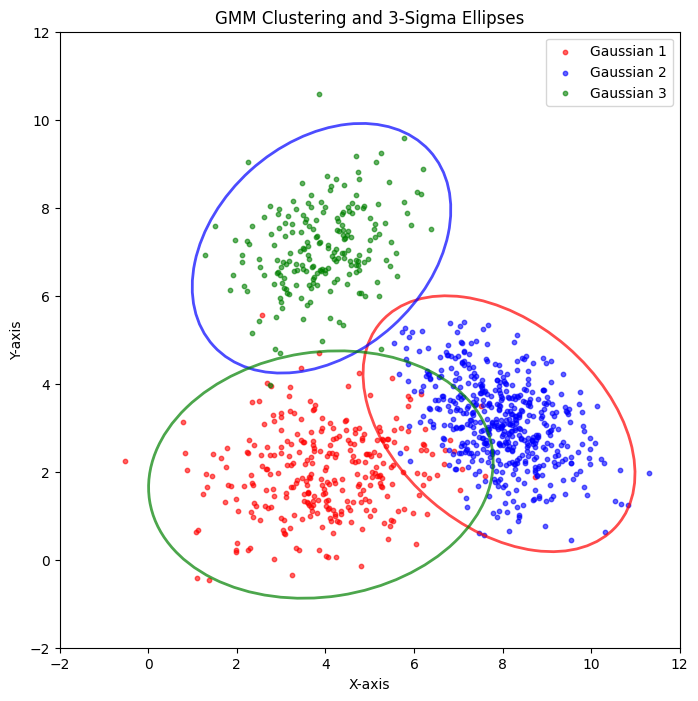

Random point: [6.37062038 4.10651959]
Soft labels: [9.75676428e-01 1.14869695e-05 2.43120847e-02]


In [2]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

def draw(mu, cov, ax = None):
    # 绘图
    if not ax:
        fig, ax = plt.subplots(figsize=(8, 8))

    # 绘制采样点的散点图
    colors = ['red', 'blue', 'green']
    offset = 0
    for i, n in enumerate(n_samples):
        points = data[offset:offset+n]
        offset += n
        ax.scatter(points[:, 0], points[:, 1], s=10, alpha=0.6, label=f"Gaussian {i+1}", color=colors[i])

    # 绘制每个高斯的椭圆
    def plot_ellipse(ax, mean, cov, color):
        eigenvalues, eigenvectors = np.linalg.eigh(cov) # PCA，主成分分析
        order = eigenvalues.argsort()[::-1]
        eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order] # 获取主轴（eigenvector）和扩散程度(eigenvalues)
        
        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1])) # 计算主轴(第一个特征向量)和坐标轴的角度
        width, height = 2 * np.sqrt(eigenvalues)
        
        ellipse = Ellipse(xy=mean, width=3*width, height=3*height, angle=angle, edgecolor=color, fc='none', lw=2, alpha=0.7)
        ax.add_patch(ellipse)

    for i, (mean, cov) in enumerate(zip(mu, cov)):
        plot_ellipse(ax, mean, cov, colors[i])

    # Add legend and show plot
    ax.legend()
    ax.set_title("GMM Clustering and 3-Sigma Ellipses")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    ax.set_xlim(-2, 12)
    ax.set_ylim(-2, 12)
    plt.show()


# 通过调包的方式实现GMM模型
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data)
draw(gmm.means_, gmm.covariances_)

# 随机去一个点，计算soft label
random_point = data[np.random.choice(data.shape[0])]
soft_labels = gmm.predict_proba(random_point.reshape(1, -1))[0]
print("Random point:", random_point)
print("Soft labels:", soft_labels)


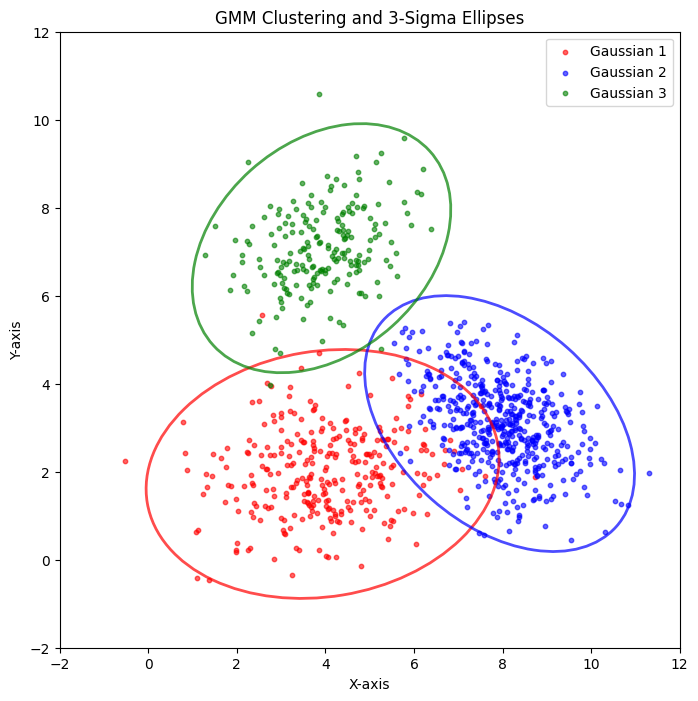

array([[3.09708075e-02, 9.69018042e-01, 1.11505003e-05]])

In [3]:
from scipy.stats import multivariate_normal

class MY_GMM():

    def __init__(self, n_componets):
        self.n_components = n_componets
        self.params_history = {'mu': [], 'sigma': []}

    def fit(self, data, epochs = 10):
        n_samples, n_dim = data.shape
        lower_bound = np.min(data, axis=0)
        upper_bound = np.max(data, axis=0)
        # 初始化参数
        self.mu = np.linspace(lower_bound, upper_bound, self.n_components + 2)
        self.mu = self.mu[1:-1]
        self.alpha = np.ones(self.n_components) * 1/self.n_components
        self.sigma = np.array([np.eye(n_dim, n_dim)] * self.n_components)

        for epoch in range(epochs):
            # E-step 计算每个数据点属于某个高斯分布的概率
            p = np.empty((n_samples, self.n_components))
            for l in range(self.n_components):
                p[:, l] = self.alpha[l] * multivariate_normal.pdf(data, mean=self.mu[l], cov=self.sigma[l])
            sum_p_z = np.sum(p, axis=1)

            # M-step 根据E-step计算的分类，通过极大似然估计更新参数
            for l in range(self.n_components):
                p_z_gaven_xandtheta = p[:, l] / sum_p_z  # 每个数据点属于第l个高斯分布的概率
                self.alpha[l] = np.sum(p_z_gaven_xandtheta) / n_samples # 第l个高斯分布的权重
                # 数据点乘上属于第l个高斯分布的概率（加权），之后平均
                self.mu[l] = (p_z_gaven_xandtheta @ data) / np.sum(p_z_gaven_xandtheta) 
                # 根据公式计算协方差矩阵，注意：相对数据进行加权，然后再进行矩阵运算。
                offset_data = data - self.mu[l]
                self.sigma[l] =  offset_data.T @ np.multiply(offset_data, p_z_gaven_xandtheta[:, None]) / np.sum(p_z_gaven_xandtheta)

            # 保存参数用于绘制动图
            self.params_history['mu'].append(self.mu.copy())
            self.params_history['sigma'].append(self.sigma.copy())

        return self.alpha, self.mu, self.sigma

    def labal(self, sample):
        sample = np.array(sample)
        if sample.ndim == 1:
            sample = sample[None, :]

        p = np.zeros((len(sample), self.n_components))
        for l in range(self.n_components):
            p[:, l] = self.alpha[l] * multivariate_normal.pdf(sample, mean=self.mu[l], cov=self.sigma[l])
        sum_p_z = np.sum(p, axis=1)

        p = p/ sum_p_z[:, None]
        hard_label = np.argmax(p, axis=1) #如果你想要hard label的话，就是这样获得
        return p # soft label

my_gmm = MY_GMM(n_componets=3)
alpha, mu, sigma = my_gmm.fit(data, epochs=50)

draw(mu=mu, cov=sigma)
my_gmm.labal([6.37062038, 4.10651959])

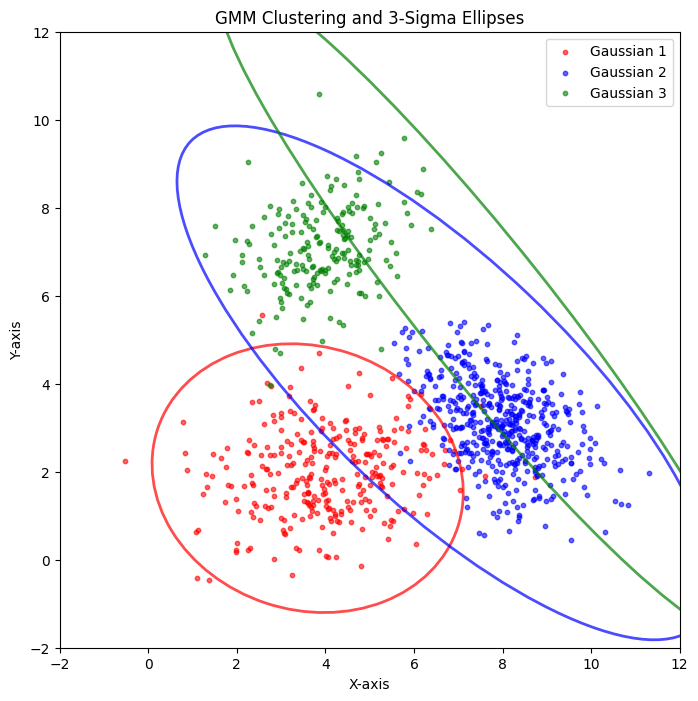

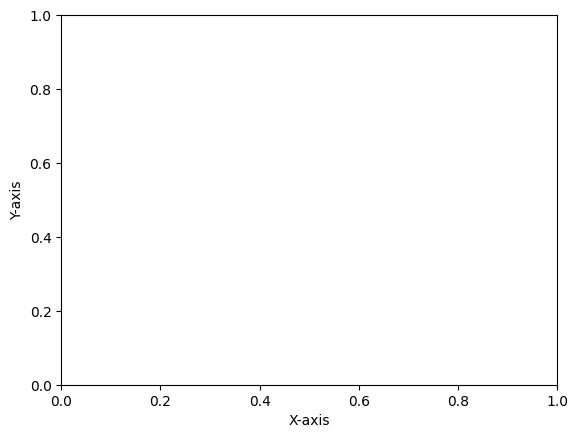

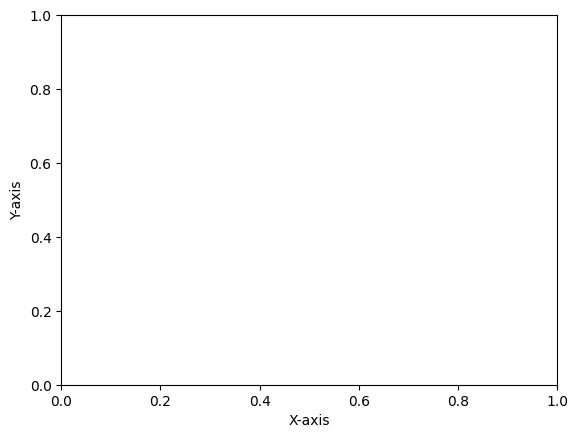

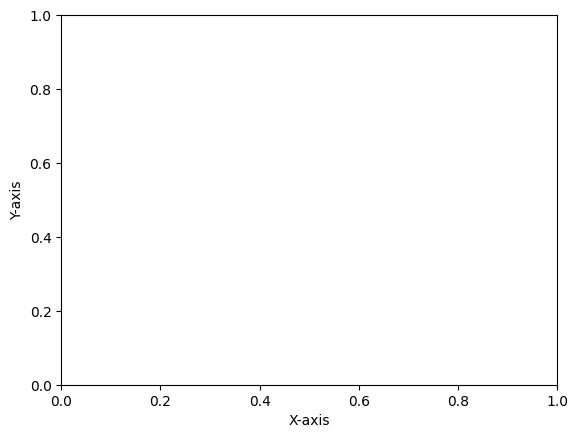

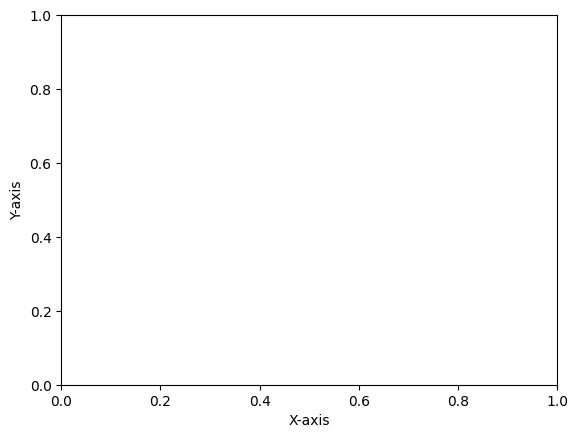

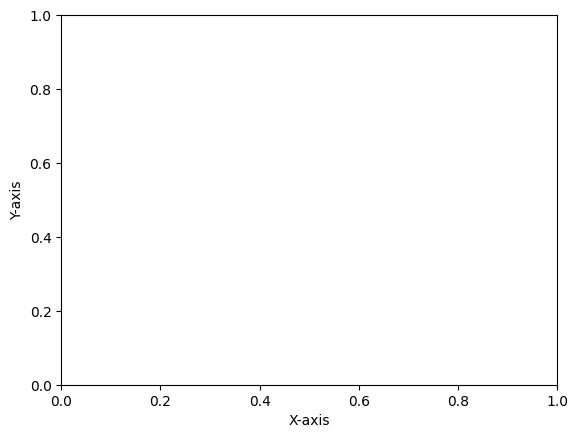

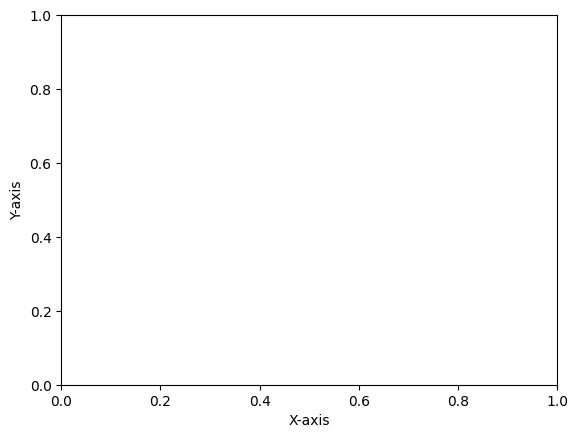

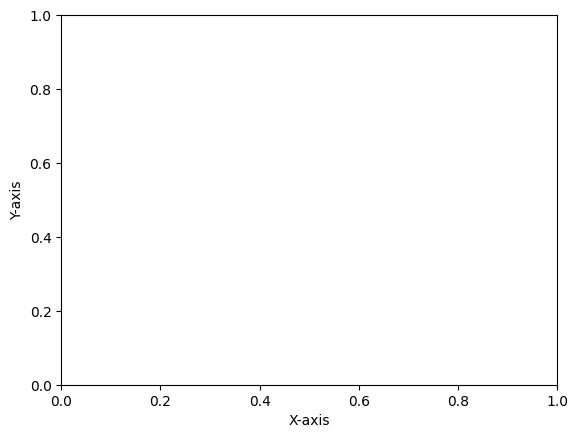

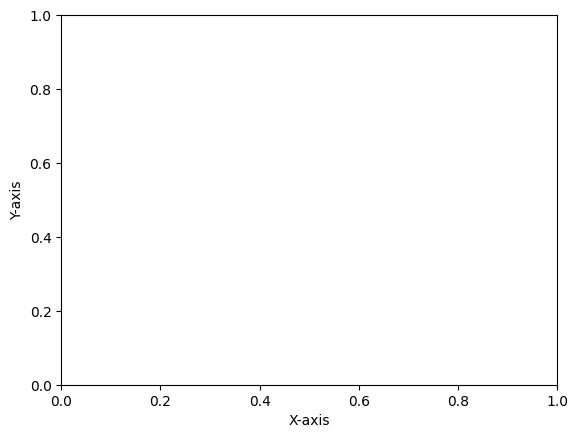

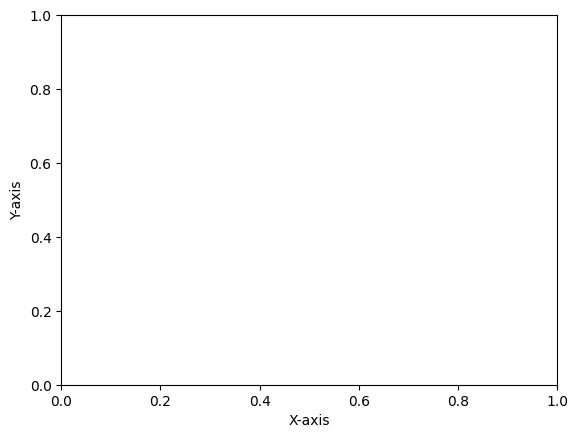

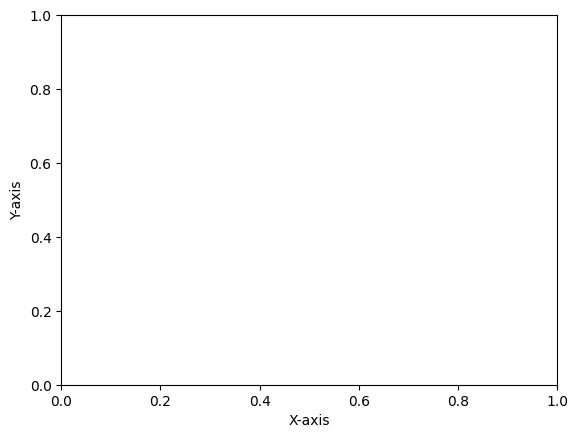

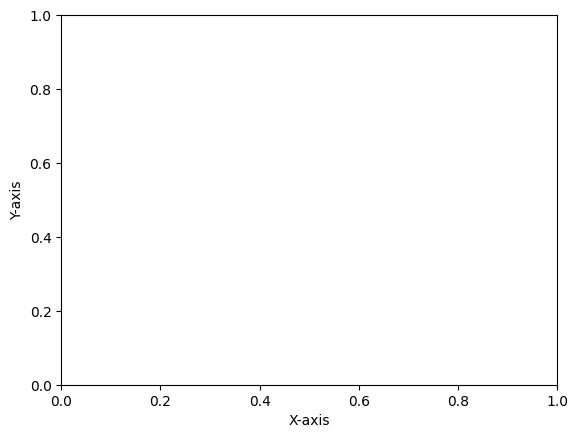

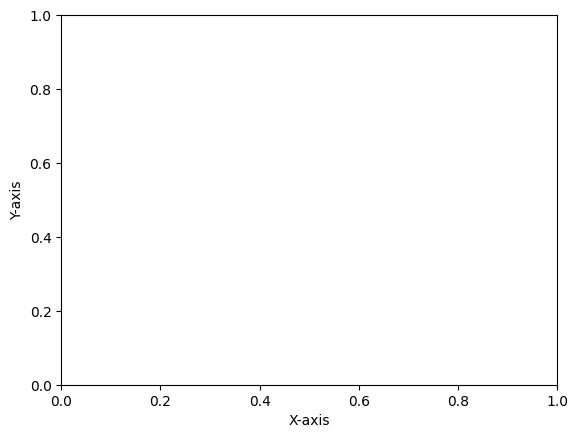

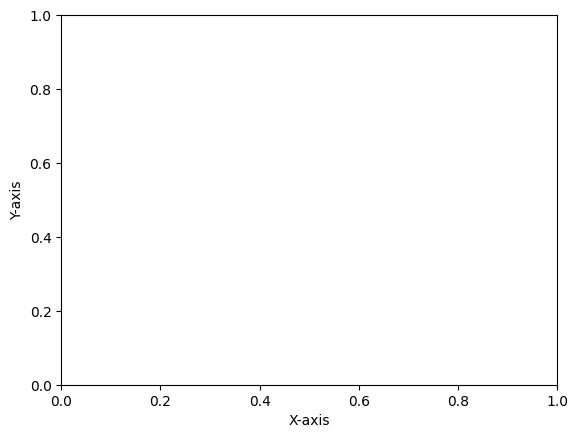

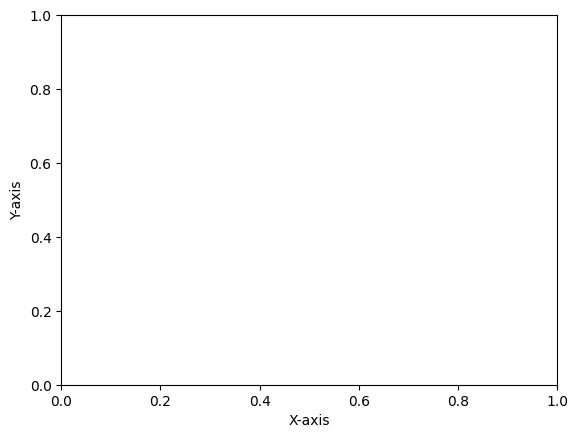

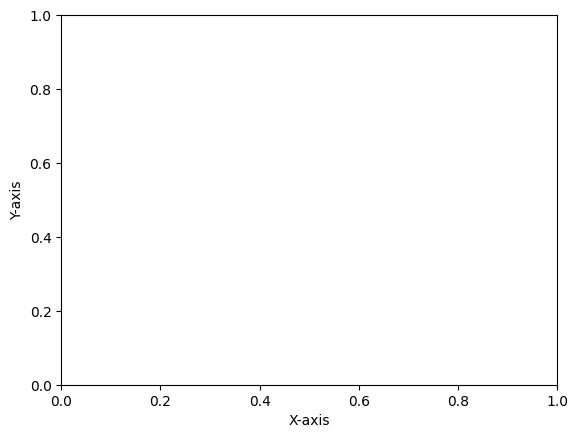

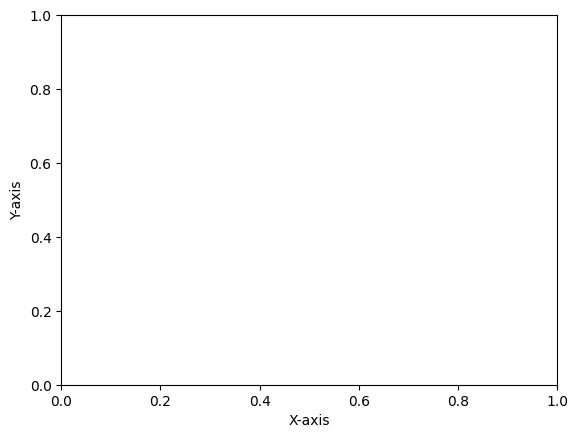

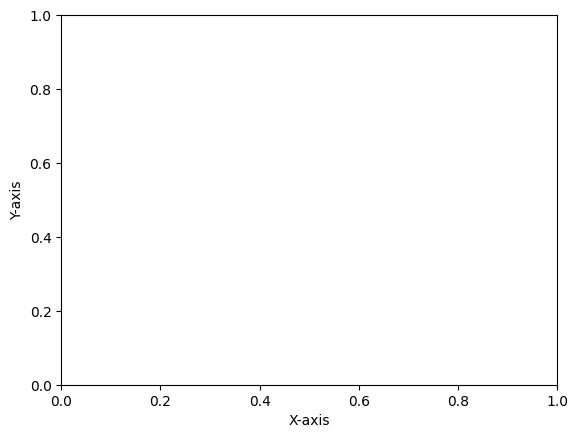

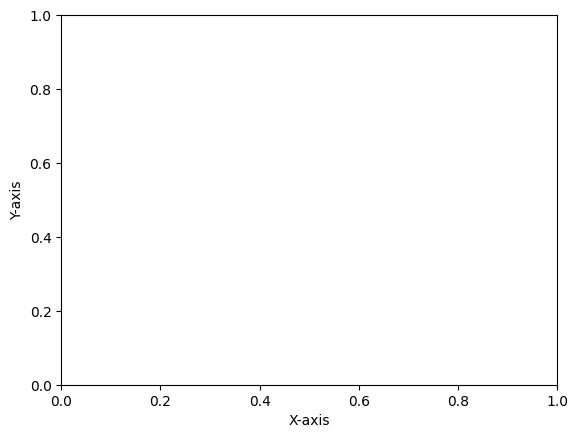

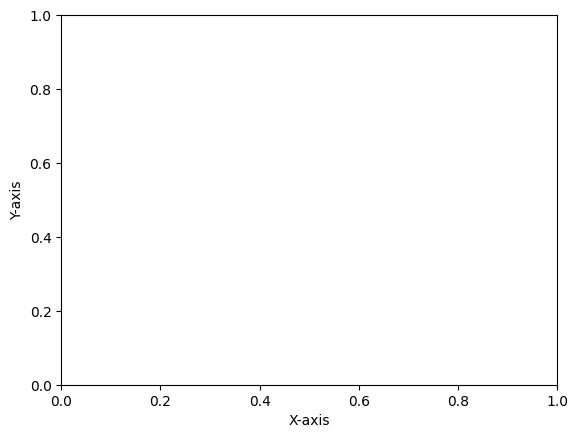

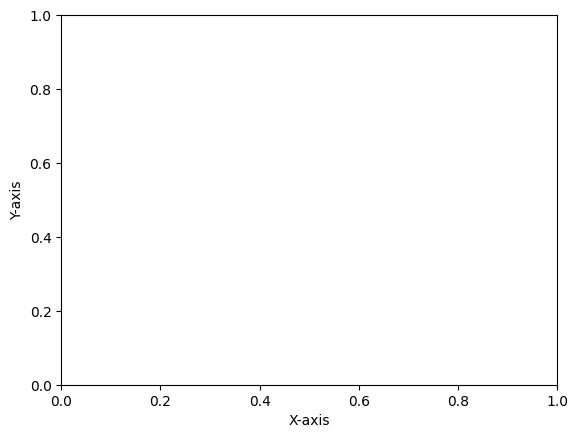

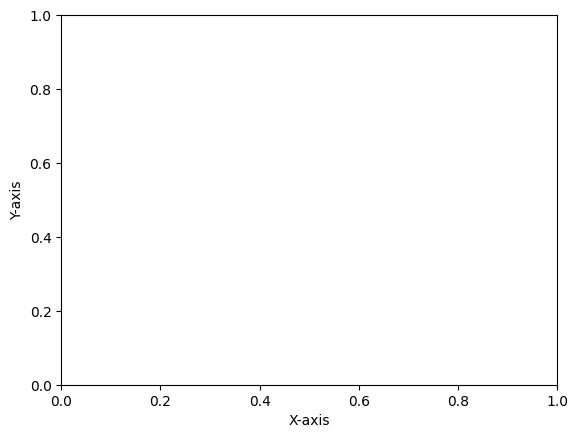

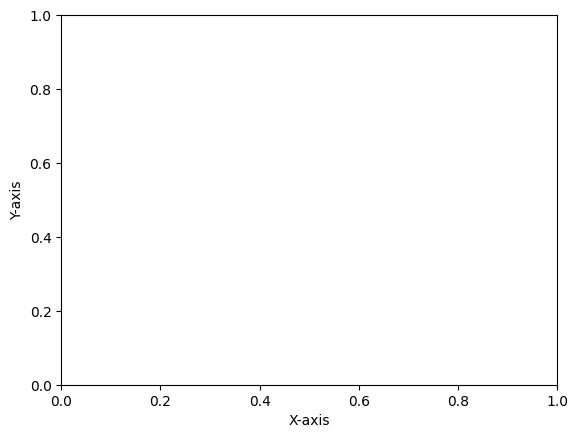

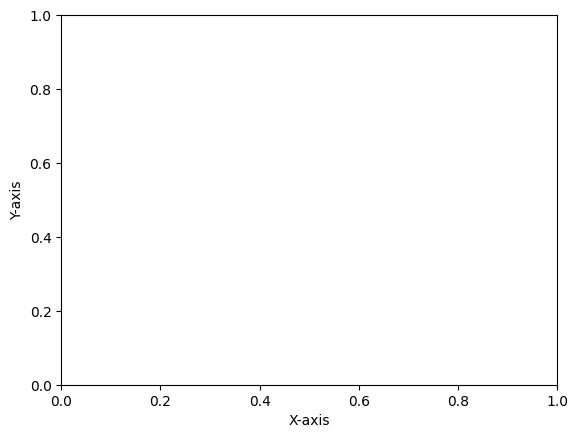

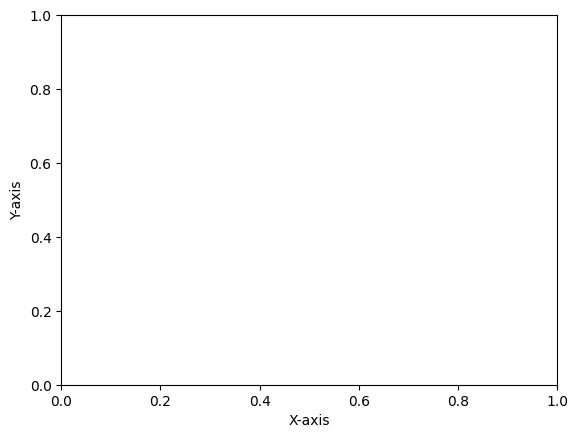

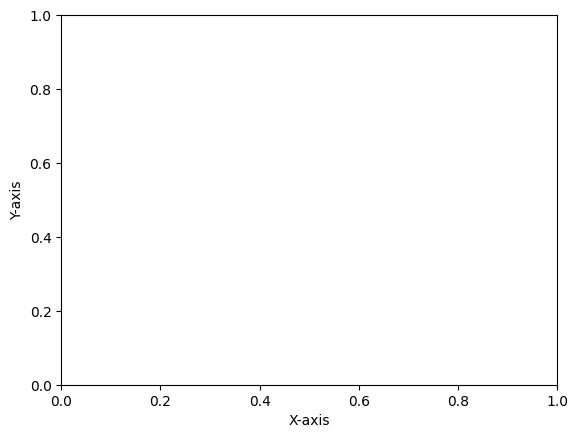

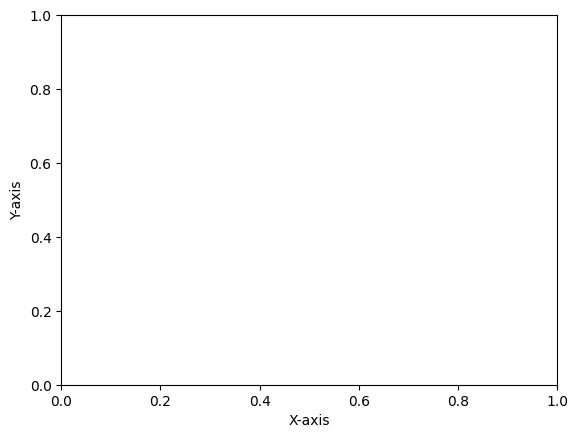

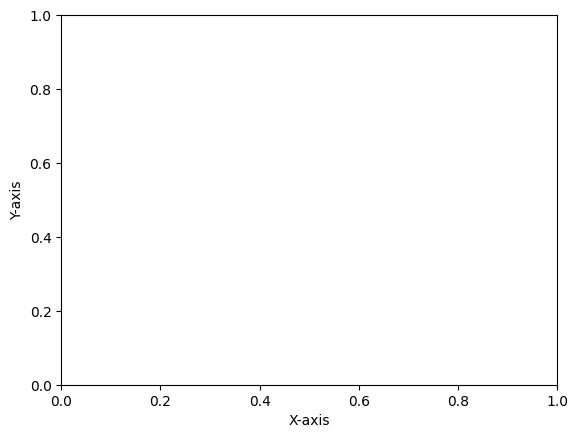

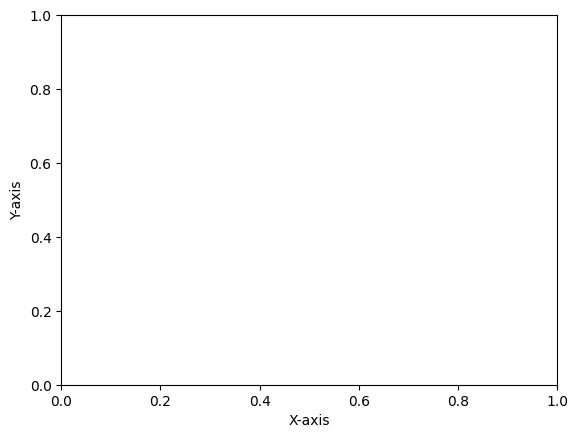

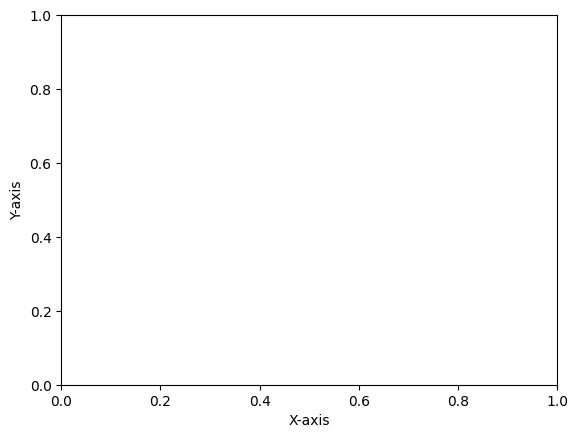

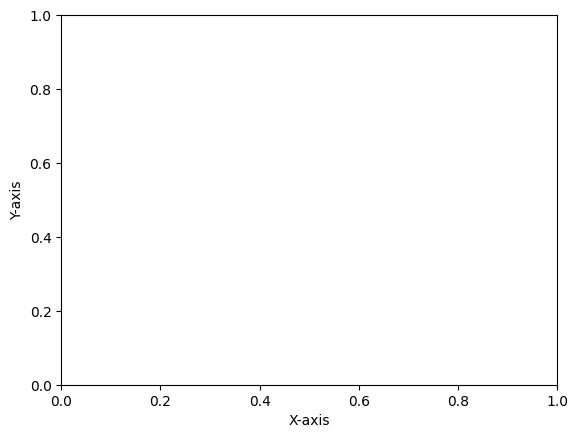

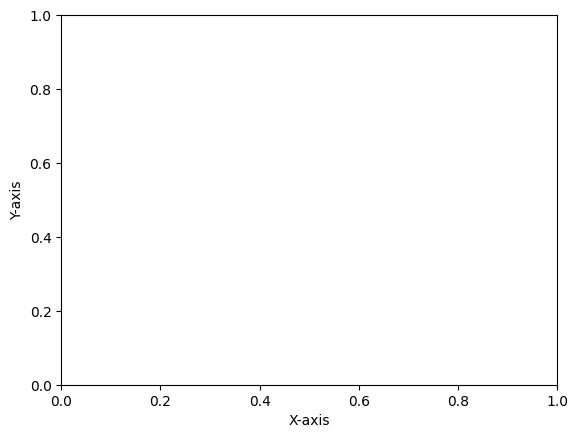

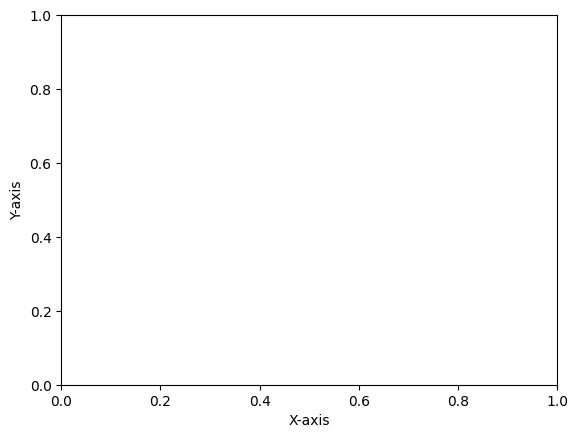

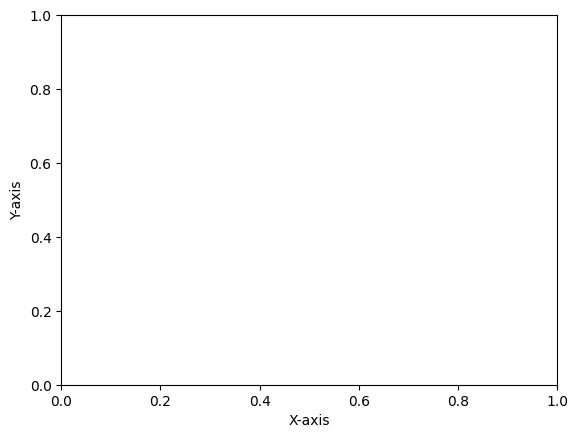

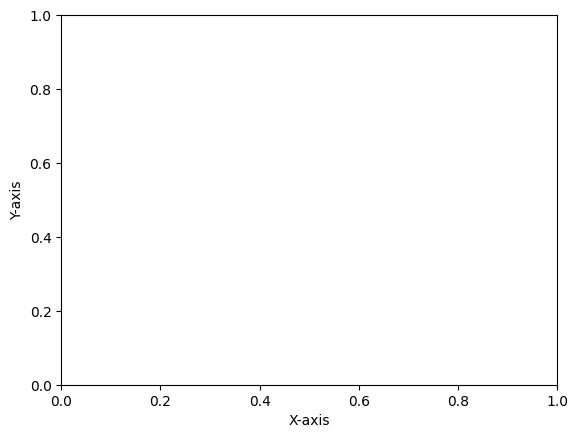

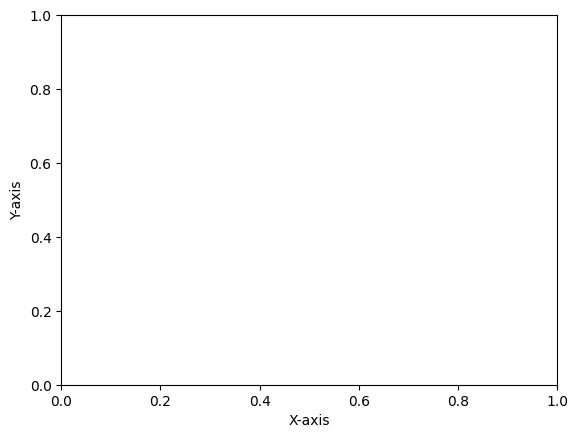

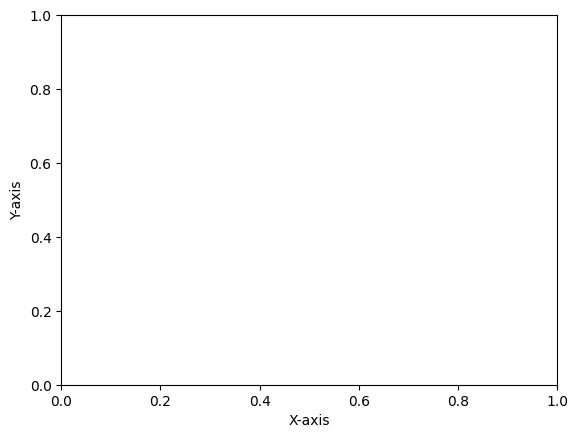

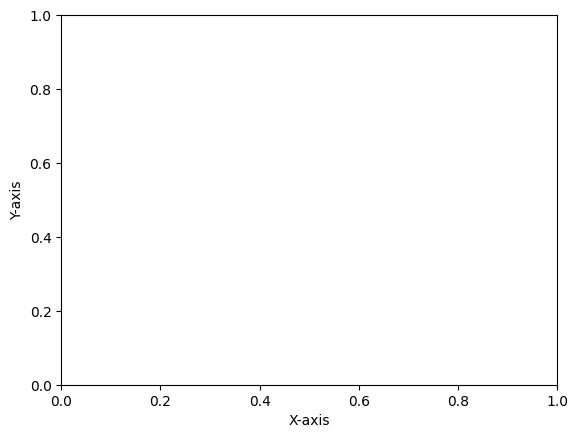

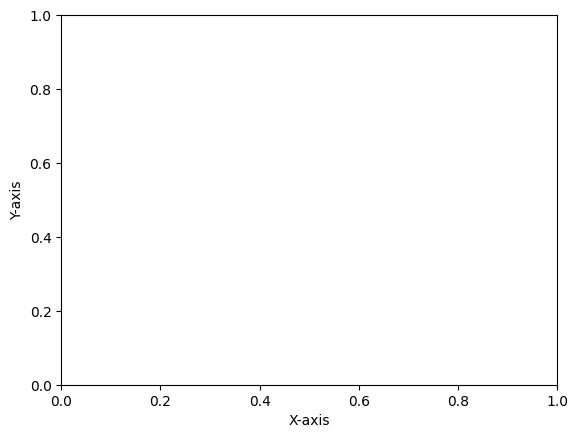

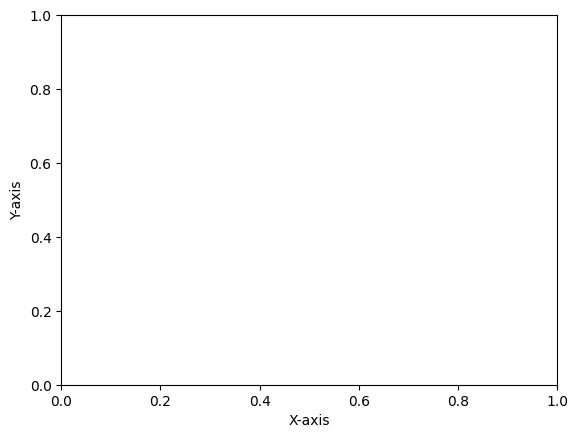

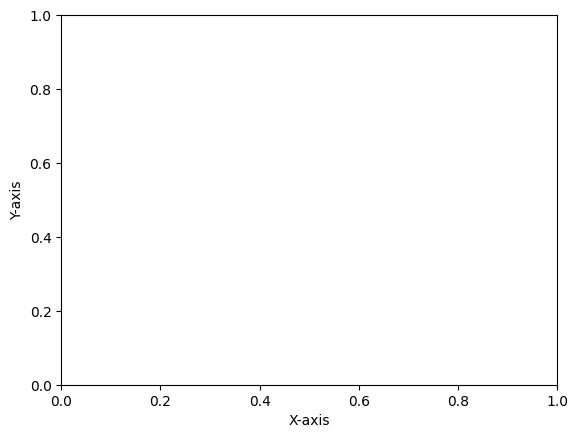

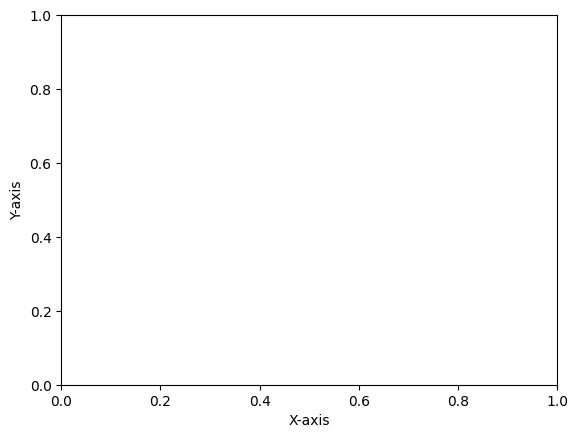

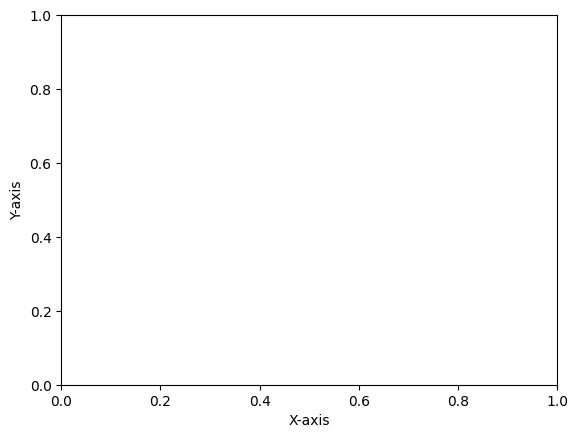

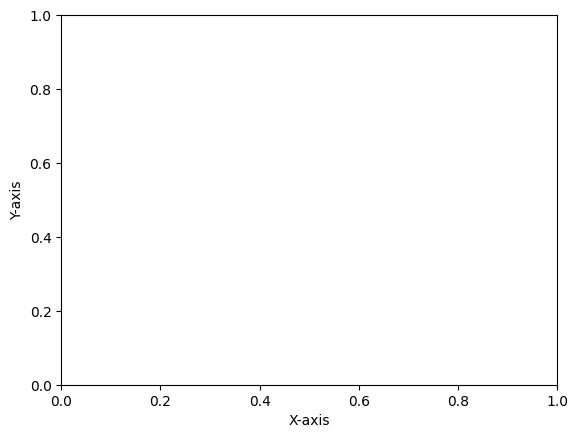

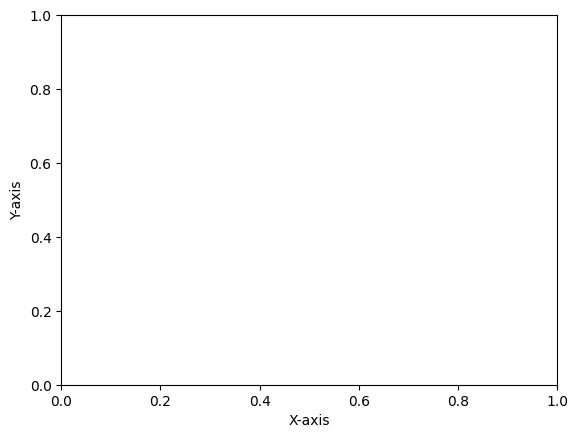

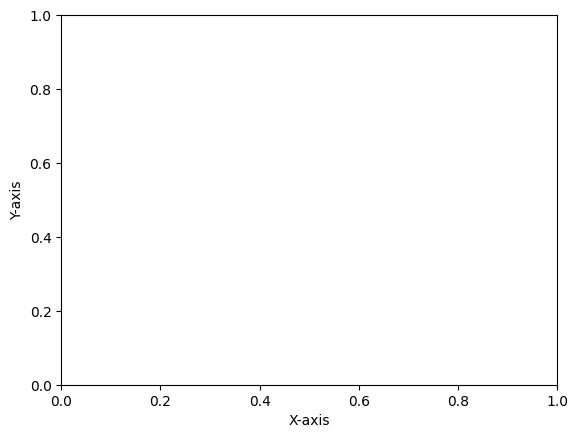

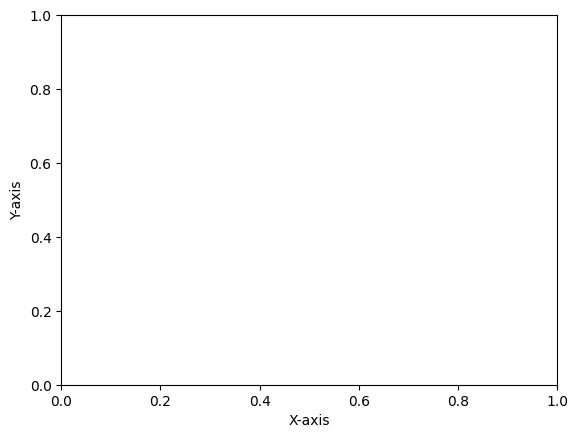

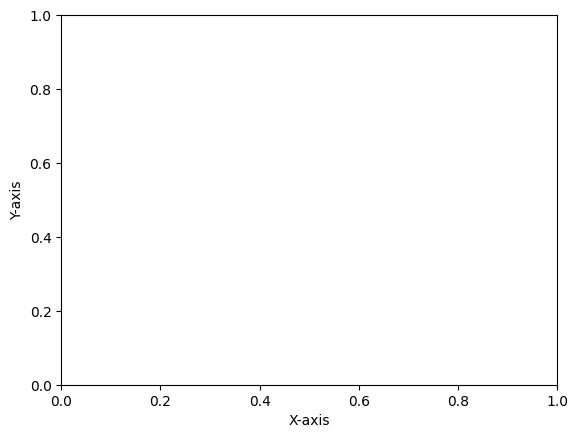

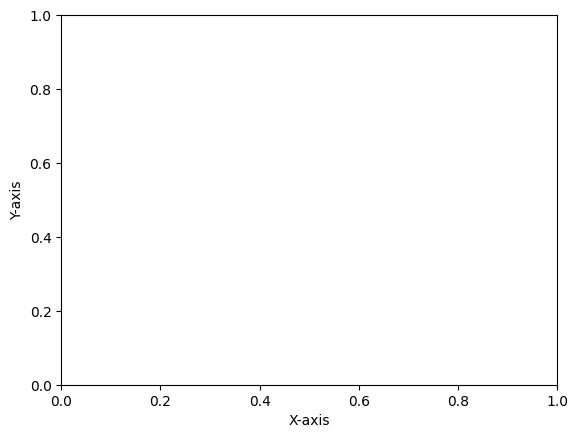

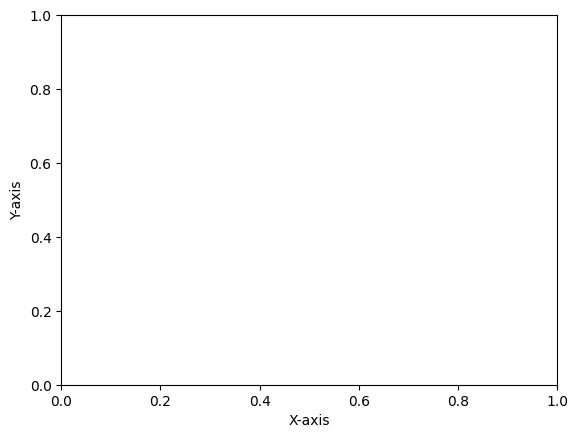

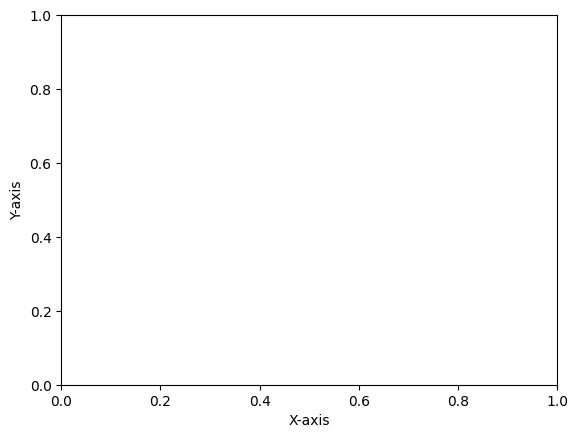

In [4]:
import matplotlib.animation as animation

def update(frame):
    ax.clear()
    draw(mu=my_gmm.params_history['mu'][frame], cov=my_gmm.params_history['sigma'][frame],ax=ax)
    return fig,

fig, ax = plt.subplots(figsize=(8, 8))
ani = animation.FuncAnimation(fig, update, frames=50, interval=200)
ani.save('gmm_animation.gif', writer='pillow')